# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [3]:
%matplotlib inline
import pandas as pd
import requests
info = requests.get('https://hds5210-data.s3.amazonaws.com/condemn.txt')
with open('data.csv','w') as file:
  file.write(info.text)
condemnations=pd.read_csv('data.csv')
condemnations['InspectDate']=pd.to_numeric(condemnations['InspectDate'].str[0:4])
pd.options.display.max_columns=40
condemnations.head()

<ipython-input-3-302b2c50fb40>:7: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations=pd.read_csv('data.csv')


,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,StDir,StName,StType,InspectDate,InspectType,CondLetterSent,Status,OwnerCompany,OwnerName,OwnerAddr,OwnerCity,OwnerState,OwnerZIP,GeoCityBLockPart,Ward00,Precinct02,Nbrhd,CDADist,CDASubDist,PoliceDist,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,,COTTAGE,AV,1986.0,CB,1986-07-15 00:00:00,W,NaN,Hughie Richard Naylor,5080 Geraldine,St. Louis,MO,63115,3652.00,4.0,3.0,56.0,13.0,26.0,5.0,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,,GEYER,AV,2009.0,CB,2009-07-23 00:00:00,B,NaN,"Ganz, Joseph R",906 Geyer Ave,St. Louis,MO,63104,666.00,7.0,12.0,21.0,8.0,16.0,3.0,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,,MARYLAND,AV,2003.0,CD,2003-08-12 00:00:00,NaN,NaN,Charles Bass,5015 Cates Ave.,St. Louis,MO,63108,3913.01,18.0,1.0,38.0,11.0,23.0,5.0,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,,COOK,AV,1996.0,CD,1996-06-24 00:00:00,W,Richard Burruss Ministries,"Richard Burruss, Pres.",4100 Page Blvd.,St. Louis,MO,63113,3744.00,19.0,13.0,58.0,13.0,25.0,5.0,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,,ST LOUIS,AV,2006.0,CD,2006-12-27 00:00:00,NaN,N & G ventures LC,"Harvey Noble, Owner",515 Olive St.Ste.1608,St. Louis,MO,63101,1103.00,5.0,13.0,60.0,14.0,6.0,4.0,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [4]:
condemnations=condemnations[(condemnations['InspectDate'] >= 1986)&(condemnations['InspectDate'] < 2015)]

In [5]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < 1986])==0)
assert(len(condemnations[condemnations['InspectDate'] >= 2015])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

B: Undergoing Repair/Rehabilitation: This status might indicate that the property is currently undergoing repairs or rehabilitation.

L: Legal/Structural Issues: It could signify that there are legal or structural issues associated with the property.

R: Ready for Inspection: This might mean that the property is ready for inspection or has recently been inspected.

W: Waiting for Action/Resolution: This status could indicate that the property is in a state of waiting, perhaps waiting for further action, resolution of issues, or a decision.

In [12]:
by_year_status = condemnations.groupby(['InspectDate', 'Status']).size().reset_index(name='Count')
by_year_status

,InspectDate,Status,Count
0,1986.0,B,22
1,1986.0,L,12
2,1986.0,R,19
3,1986.0,W,112
4,1987.0,B,91
...,...,...,...
93,2013.0,L,209
94,2013.0,R,1
95,2013.0,W,2
96,2014.0,B,17


In [17]:
by_year =by_year_status.pivot(values='Count', index='InspectDate', columns='Status').fillna(0)
# pivot_table(values='Status', index='InspectDate', columns='Status', aggfunc=np.ma.count, fill_value=0)

In [15]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


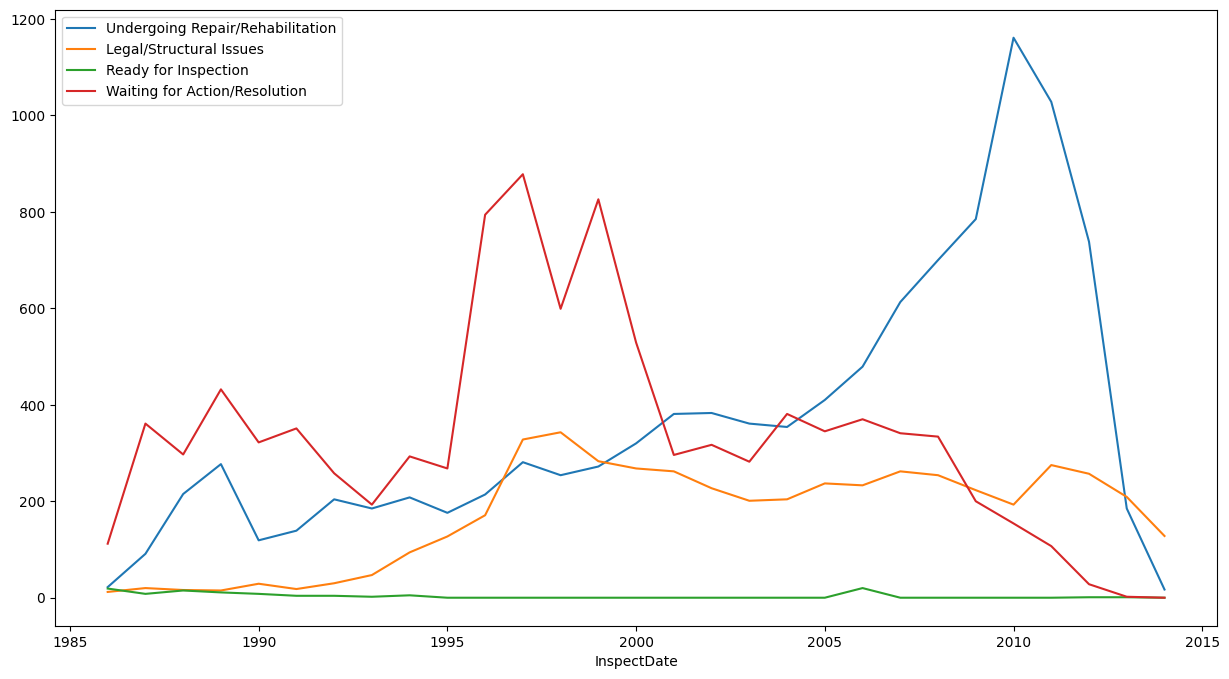

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

by_year.plot(figsize=(15,8))
plt.legend(['Undergoing Repair/Rehabilitation','Legal/Structural Issues','Ready for Inspection','Waiting for Action/Resolution'])

---

Undergoing Repair/Rehabilitation: Cases in this category are those that have been approved for repair or rehabilitation and are currently in the process of being fixed. This process can take several months or even years, depending on the severity of the damage.

Legal/Structural Issues: Cases in this category are those that have legal or structural issues that need to be addressed before they can be repaired or rehabilitated. For example, a case may be in this category if there is a dispute over who is responsible for paying for the repairs or if the property needs to be brought up to code.

Ready for Inspection: Cases in this category are those that have been repaired or rehabilitated and are now ready to be inspected by a building official. Once the inspection is passed, the property can be reoccupied.

Waiting for Action/Resolution: Cases in this category are those that are waiting for some kind of action or resolution. For example, a case may be in this category if it is waiting for a decision from a court or if it is waiting for funding to be approved.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [21]:
import pandas as pd
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')
meetings['startDate'] = meetings['startTime'].str[0:10]
meetings['startDate'] = pd.to_datetime(meetings['startDate'])
Before_Filter = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] < '2020-02-29')
During_Filter = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] < '2020-03-28')
meetings.loc[Before_Filter,'Before'] = 'BEFORE'
meetings.loc[During_Filter,'During'] = 'DURING'
meetings=meetings[(meetings['Before']=='BEFORE') | (meetings['During']=='DURING')]
summary = meetings[['userName','Before','During']]

In [22]:
pd.options.display.max_columns=50
meetings

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,joinDate,joinWeek,joinMonth,participants,participantMinutes,meetingDurationMinutes,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes,startDate,Before,During
59,418327-3e2a5afc-1b17-4c51-933d-552855a3e8b2,Angie's Meeting,409230643,angie.warren,3313169,NaN,2020-03-27 22:21:52,2020-03-27 22:00:23,angie.warren@amitechsolutions.com,2513,2020-03-27,2020-03-22,2020-03,2,41.8833,21.4833,25,ENTERPRISE_PAID,True,True,2020-03-27 22:00:23.0,NaN,NaN,NaN,NaN,2020-03-27,NaN,DURING
60,418321-bb98a085-244c-4522-b261-029b03408278,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-27 21:20:28,2020-03-27 20:58:29,Drew.Marco@AmitechSolutions.com,4816,2020-03-27,2020-03-22,2020-03,4,80.2667,21.9833,25,ENTERPRISE_PAID,True,True,2020-03-27 20:58:29.0,NaN,NaN,NaN,NaN,2020-03-27,NaN,DURING
61,418318-1267d351-6ffd-4f72-a23e-b2eb98c8363c,Paul's Meeting,747887819,paul.boal,2385853,NaN,2020-03-27 20:51:13,2020-03-27 20:29:51,paul.boal@amitechsolutions.com,2122,2020-03-27,2020-03-22,2020-03,2,35.3667,21.3667,25,ENTERPRISE_PAID,True,True,2020-03-27 20:29:51.0,NaN,NaN,NaN,NaN,2020-03-27,NaN,DURING
62,418315-ccd6d6da-86de-40c6-ac18-be9859e01a0e,Project Impacts/Issues Review,718434768,shawn.reilly.amitechsolutions,3295617,NaN,2020-03-27 21:21:35,2020-03-27 19:56:12,shawn.reilly@amitechsolutions.com,17513,2020-03-27,2020-03-22,2020-03,5,291.8833,85.3833,110,ENTERPRISE_PAID,True,False,2020-03-27 19:56:12.0,NaN,NaN,NaN,NaN,2020-03-27,NaN,DURING
63,418314-85ea8bec-311c-456c-af22-8f0ca61267ba,Waylit/Amitech Intro call,677187713,amit.bhagat,2756615,NaN,2020-03-27 20:43:52,2020-03-27 19:53:30,amit.bhagat@amitechsolutions.com,8147,2020-03-27,2020-03-22,2020-03,4,135.7833,50.3667,110,ENTERPRISE_PAID,True,True,2020-03-27 19:53:30.0,NaN,NaN,NaN,NaN,2020-03-27,NaN,DURING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,412699-bd70d76d-66ba-4dfb-9dca-fd8d0aa6328c,Discuss Fin ROI targets for levers,961833130,amit.bhagat,2756615,NaN,2020-02-17 20:49:27,2020-02-17 20:00:36,amit.bhagat@amitechsolutions.com,5826,2020-02-17,2020-02-16,2020-02,2,97.1000,48.8500,100,ENTERPRISE_PAID,True,True,2020-02-17 20:00:36.0,NaN,NaN,NaN,NaN,2020-02-17,BEFORE,NaN
690,412677-90e23eb4-160e-42bf-bdbe-c3fe83e5d050,Michael's Meeting,148262451,michael.demos,2776734,NaN,2020-02-17 16:17:32,2020-02-17 16:17:14,michael.demos@amitechsolutions.com,9,2020-02-17,2020-02-16,2020-02,1,0.1500,0.3000,100,ENTERPRISE_PAID,False,True,2020-02-17 16:17:14.0,NaN,NaN,NaN,NaN,2020-02-17,BEFORE,NaN
691,412675-d8878bd4-4c40-4813-ab7b-a4605cd9fcbc,Touch base with Gaurov on HA,495894982,amit.bhagat,2756615,NaN,2020-02-17 16:30:46,2020-02-17 16:00:57,amit.bhagat@amitechsolutions.com,5068,2020-02-17,2020-02-16,2020-02,4,84.4667,29.8167,100,ENTERPRISE_PAID,True,True,2020-02-17 16:00:57.0,NaN,NaN,NaN,NaN,2020-02-17,BEFORE,NaN
692,412665-6d02d27c-6be4-4ac8-bbfc-932c20962f5b,Paul's Meeting,159330425,paul.smith.amitechsolutions,3010068,NaN,2020-02-17 14:17:57,2020-02-17 14:17:22,paul.smith@amitechsolutions.com,27,2020-02-17,2020-02-16,2020-02,1,0.4500,0.5833,110,ENTERPRISE_PAID,False,True,2020-02-17 14:17:22.0,NaN,NaN,NaN,NaN,2020-02-17,BEFORE,NaN


In [27]:
len(summary.userName.unique())

22

In [7]:
meetings['startDate'].value_counts()

2020-03-23    42
2020-03-26    34
2020-02-18    33
2020-03-24    32
2020-03-30    30
              ..
2020-03-22     1
2020-02-09     1
2020-01-26     1
2020-02-23     1
2020-01-25     1
Name: startDate, Length: 72, dtype: int64

---

In [ ]:
assert(len(summary) == 22)

In [ ]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
